# Homework Assignment 2: Deep Learning Foundation

<div class="alert alert-block alert-warning">Each assignment needs to be completed independently. Never ever copy others' work (even with minor modification, e.g. changing variable names). Anti-Plagiarism software will be used to check all submissions. </div>

## Objectives:


- Start to learn PyTorch programming
- Practice creating sequential models with PyTorch
- Learn techniques to fight with underfitting and overfitting
    - Layer configuration
    - Regularizers
    - Optimizers





## Instructions


- Check `Lab 2: Overfitting_Underfitting` before you start working on this assignment. These labs should give you a good starting point.
- Please complete all questions using Jupyter Notebook.
- Please answer all analysis questions using Jupyter Notebook Markdowns or in a separate pdf file (if you don't know how to write Markdowns).
- Please run your Jupyter Notebook to get all training histories and plots, save the notebook to pdf file, and sumbit the pdf file along with the Jupyter Notebook


## The FashionMNIST dataset

-  `FashionMNIST`, a dataset of article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. For details, check https://github.com/zalandoresearch/fashion-mnist
- To reduce the training time, `we'll only use 6000 images for training`
- See code below to load dataset

In [1]:
#! pip install torchinfo

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, random_split, Subset
import torchvision.transforms as transforms

import torchvision

from numpy.random import seed
import torch
import numpy as np

from torchinfo import summary
import matplotlib.pyplot as plt

In [2]:
# Load dataset

train_dataset = torchvision.datasets.FashionMNIST('./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.FashionMNIST('./data',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

/Users/rliu/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
# Randomly select 6000 for training

N = len(train_dataset)
train_dataset = Subset(train_dataset, np.random.choice(N, 6000, replace=False))

In [4]:
# Split dataset into training and evaluation

N = len(train_dataset)
train_size = int(0.7*N)
train_dataset, val_dataset = random_split(train_dataset,\
                                          lengths=[train_size, N - train_size])

print(f'Train dataset length: {len(train_dataset)}')
print(f'Validation dataset length: {len(val_dataset)}')


Train dataset length: 4200
Validation dataset length: 1800


image tensor: torch.Size([32, 1, 28, 28])
class labels: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8])


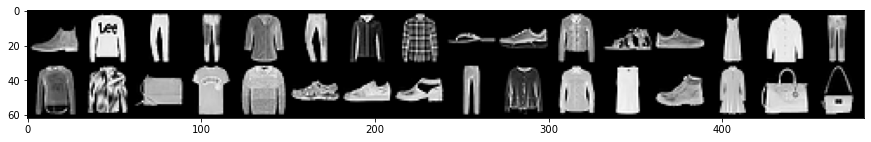

In [5]:
# Show some images from test dataset

batch_size = 32

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
imgs, labels = next(iter(test_loader))
plt.figure(figsize=(15,10))
grid = torchvision.utils.make_grid(nrow=16, ncols=2, tensor=imgs)
print(f"image tensor: {imgs.shape}")
print(f"class labels: {labels}")
plt.imshow(np.transpose(grid, axes=(1,2,0)), cmap='gray');

## Q1: Create a simple model with only 1 hidden linear layer (6 points)

1. **Model A**: Create a simple feedforward model as follows: `(2 points)`
    - The model has `1 hidden layer`. In your first configuration, you can `configure this linear layer to have 64 units`. You need to choose a right activation function for this hidden layer
    - Add the output layer. Be sure to set the right number of units and activation function for this ouputput layer. 
 <br><br>

2. Define a function `fit_model(model, train_dataset, eval_dataset, test_dataset, device, optimizer, epochs=30, batch_size=128)`, and use this function to train the model as follows: `(1 point)`
    - Create a dataload for each dataset to get mini-batches
    - You need to `flatten each image (shape of (1, 28, 28)) to (784,)` so that it can enter the hidden layer.
    - Train the model using `train_dataset`, evaluate model loss and accuracy using `eval_dataset`, and record the evaluation loss and accuracy history.
    - When training completes, test the model using `test_dataset`, and calculate the `test accuracy`. `(deduct 0.5 if testing accuracy is not calcuated)`
    - Return test accuracy, and evaluation loss and accuracy histories
<br><br>
3. When you train the model, you'll need to tune the following hyperparameters. Here are suggested values for some parameters for you to get started: 
    - optimizer: RMSProp
    - loss: `pick a right loss function` from this list: https://pytorch.org/docs/stable/nn.html#loss-functions 
    - batch_size: 128 (this depends on the CPU/GPU of your computer)
    - epoch: 100
    - learning rate: 0.0005
<br><br>
4.  **Model B**: After you complete training your Model A, now you can configure the hidden layer by gradually increasing or decreasing the number of units. Your taget is to improve the evaluation/test accuracy by at least 1%. `(1 point. Deduct 0.5 if testing accuracy is not improved by 1%)`
<br><br>
5. Plot evaluation loss / accuracy vs. epoches for these two models `(1 point, deduct 0.5 if test accuracy is below 80%)`
    - Reference plots are provided. You may generate different plots.
    - In general, the evaluation and test accuracy of this problem should be `80%-84%`.
 <br><br>   
6. Write your analysis (as markdowns or a seperate pdf file) on the following: `(1 point)`
   - How many parametes does each model has? `(0.3 point)`: *see model summary*
   - For each model, do you observe underfitting or overfitting? `(0.3 point)`: *underfitting can be seen in about epochs 0-20. Model B has overfitted slightly after epoch 60 but not much in Model A*
   - Which model in general performs better than the other in terms of evaluation loss / accuracy? Explain why this model outperforms the other. `(0.4 point)`: *Model B has slightly higher evaluation accuracy and lower evaluation loss. This is due to increased hidden units and model capacity*.

In [6]:
# Fix random number so that your traing process can be replicated

random_seed = 124
seed(random_seed)

torch.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True

In [43]:
class linear_model(nn.Module):
    
    # hidden_units is a list which specify the output of each layer
    def __init__(self, input_dim = 784, hidden_units=[256]):
        
        # initialize parent class
        super(linear_model, self).__init__()
        
        hidden_units = [input_dim] + hidden_units
        
        self.layers = nn.ModuleList([nn.Linear(hidden_units[i], hidden_units[i+1]) \
                                     for i in range(len(hidden_units)-1)])
    
    def forward(self, x):
        
        output = x
        #print(x.size())
        for i, layer in enumerate(self.layers):
            
            output = layer(output)
            #print(output.size())
            
            if i<len(self.layers)-1:   # no activation on the last layer
                output = F.relu(output)
        
        return output

In [44]:
def train_model(model, train_dataset, val_dataset, test_dataset, device, 
                optimizer, epochs=30, batch_size=128):
    
    # construct dataloader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # move model to device
    model = model.to(device)

    # history
    history = {'train_loss': [],
               'train_acc': [],
               'val_loss': [],
               'val_acc': []}

    # setup loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # training loop
    print('Training Start')
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0
        
        for x, y in train_loader:
            
            # move data to device
            x = x.view(x.size(0), -1).to(device)
            y = y.to(device)
            
            # forward
            outputs = model(x)  # (num_batch, 45) 
            _, pred = torch.max(outputs, dim = -1)
            cur_train_loss = criterion(outputs, y)
            cur_train_acc = (pred == y).sum().item() / y.size(0)
            
            # backward
            cur_train_loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            # loss and acc
            train_loss += cur_train_loss
            train_acc += cur_train_acc

        # test start
        model.eval()
        with torch.no_grad():
            for x, y in val_loader:
                # move
                x = x.view(x.size(0), -1).to(device)
                y = y.to(device)
                
                # predict
                outputs = model(x)
                _, pred = torch.max(outputs, dim = -1)
                cur_val_loss = criterion(outputs, y)
                cur_val_acc = (pred == y).sum().item() / y.size(0) 
                
                # loss and acc
                val_loss += cur_val_loss
                val_acc += cur_val_acc

        # epoch output
        train_loss = (train_loss/len(train_loader)).item()
        train_acc = train_acc/len(train_loader)
        val_loss = (val_loss/len(val_loader)).item()
        val_acc = val_acc/len(val_loader)
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        print(f"Epoch:{epoch + 1} / {epochs}, train loss:{train_loss:.3f} train_acc:{train_acc:.3f}, valid loss:{val_loss:.3f} valid acc:{val_acc:.3f}")
    
    # Test performance
    model.eval()
    ys = []
    preds = []

    with torch.no_grad():
        for x, y in test_loader:
            # move
            x = x.view(x.size(0), -1).to(device)

            # predict
            outputs = model(x)
            _, pred = torch.max(outputs, dim = -1)

            preds.append(pred.view(-1).cpu().numpy())
            ys.append(y)

    ys = np.concatenate(ys)
    preds = np.concatenate(preds)

    test_acc = (ys==preds).astype(int).sum()/len(ys)
    print(f"test acc:{test_acc:.3f}")

    return test_acc, history

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [46]:
# dataset

modela = linear_model(input_dim = 784, hidden_units=[64,  10])
summary(modela, (32, 784))

optimizer = torch.optim.RMSprop(modela.parameters(), lr = 0.0005)
acc_a, hista = train_model(modela, train_dataset, val_dataset, test_dataset, device, optimizer, epochs=100)

Layer (type:depth-idx)                   Output Shape              Param #
linear_model                             --                        --
├─ModuleList: 1-1                        --                        --
│    └─Linear: 2-1                       [32, 64]                  50,240
│    └─Linear: 2-2                       [32, 10]                  650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
Total mult-adds (M): 1.63
Input size (MB): 0.10
Forward/backward pass size (MB): 0.02
Params size (MB): 0.20
Estimated Total Size (MB): 0.32

Training Start
Epoch:1 / 100, train loss:1.228 train_acc:0.604, valid loss:0.859 valid acc:0.713
Epoch:2 / 100, train loss:0.822 train_acc:0.728, valid loss:0.744 valid acc:0.736
Epoch:3 / 100, train loss:0.735 train_acc:0.754, valid loss:0.671 valid acc:0.786
Epoch:4 / 100, train loss:0.677 train_acc:0.771, valid loss:0.629 valid acc:0.793
Epoch:5 / 100, train loss:0.642 train_acc:0.781, valid loss:0.612 valid acc:0.778
Epoch:6 / 100, train loss:0.614 train_acc:0.791, valid loss:0.594 valid acc:0.772
Epoch:7 / 100, train loss:0.591 train_acc:0.804, valid loss:0.572 valid acc:0.786
Epoch:8 / 100, train loss:0.570 train_acc:0.809, valid loss:0.556 valid acc:0.794
Epoch:9 / 100, train loss:0.554 train_acc:0.816, valid loss:0.541 valid acc:0.808
Epoch:10 / 100, train loss:0.535 train_acc:0.826, valid loss:0.532 valid acc:0.811
Epoch:11 / 100, train loss:0.526 train_acc:0.821, valid loss:0.532 valid acc:0.811
Epoch:12 / 100, train loss:0.511 train_acc:0.831, valid loss:0.523 valid acc:0.81

In [47]:
# dataset

modelb = linear_model(input_dim = 784, hidden_units=[512,  10])
summary(modelb, (32, 784))

optimizer = torch.optim.RMSprop(modelb.parameters(), lr = 0.0005)
acc_b, histb = train_model(modelb, train_dataset, val_dataset, test_dataset, device, optimizer, epochs = 100)

Layer (type:depth-idx)                   Output Shape              Param #
linear_model                             --                        --
├─ModuleList: 1-1                        --                        --
│    └─Linear: 2-1                       [32, 512]                 401,920
│    └─Linear: 2-2                       [32, 10]                  5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
Total mult-adds (M): 13.03
Input size (MB): 0.10
Forward/backward pass size (MB): 0.13
Params size (MB): 1.63
Estimated Total Size (MB): 1.86

Training Start
Epoch:1 / 100, train loss:1.086 train_acc:0.617, valid loss:0.739 valid acc:0.724
Epoch:2 / 100, train loss:0.702 train_acc:0.753, valid loss:0.631 valid acc:0.767
Epoch:3 / 100, train loss:0.623 train_acc:0.782, valid loss:0.607 valid acc:0.776
Epoch:4 / 100, train loss:0.566 train_acc:0.807, valid loss:0.558 valid acc:0.789
Epoch:5 / 100, train loss:0.538 train_acc:0.814, valid loss:0.559 valid acc:0.785
Epoch:6 / 100, train loss:0.518 train_acc:0.817, valid loss:0.565 valid acc:0.789
Epoch:7 / 100, train loss:0.487 train_acc:0.828, valid loss:0.527 valid acc:0.803
Epoch:8 / 100, train loss:0.470 train_acc:0.837, valid loss:0.496 valid acc:0.814
Epoch:9 / 100, train loss:0.452 train_acc:0.845, valid loss:0.495 valid acc:0.804
Epoch:10 / 100, train loss:0.436 train_acc:0.854, valid loss:0.471 valid acc:0.832
Epoch:11 / 100, train loss:0.417 train_acc:0.859, valid loss:0.461 valid acc:0.829
Epoch:12 / 100, train loss:0.403 train_acc:0.862, valid loss:0.468 valid acc:0.83

In [48]:
def get_plot(hist_list, labels, epochs):
    
    colors = ['red',"blue","green","orange"]
    
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    for i, hist in enumerate(hist_list):
        ax[0].plot(range(len(hist['val_loss'])), hist['val_loss'], '-', color = colors[i], label=labels[i])
        
    ax[0].set_title('Evaluation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    
    for i, hist in enumerate(hist_list):
        ax[1].plot(range(len(hist['val_acc'])), hist['val_acc'], '-', color = colors[i], label=labels[i])
        

    ax[1].set_title('Evaluation Acc.')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Acc.')
    ax[1].legend()
   
    plt.show()

Test acc: model A 0.834, model B 0.846


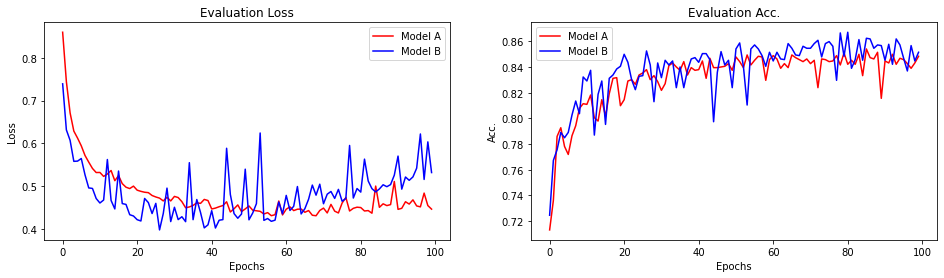

In [49]:
print(f"Test acc: model A {acc_a:.3f}, model B {acc_b:.3f}")

get_plot([hista, histb], ["Model A","Model B"], len(hista['val_loss']))

## Q2: Fight overfitting using Dropout 
`(2 points)`


**Model C**: Take the `best model` you achieved from Q1, add a `Dropout layer after the input and the hidden layers`. Tune the dropout rate accordingly. `(1 point. Two dropout layers must be added)`
<br><br>
Train the  model using the training function. Plot evaluation loss / accuracy vs. epoches from the training histories of all the three models.
<br><br>
Write your analysis (as markdowns or in a separate pdf file) on the following: `(1 point)`
- Is Dropout a good strategy to address overfitting? Do you observe any changes to the learning curve?`(0.5 point)`: *yes, the learning curve becomes smoothier, and it reduces overfitting in Model B and improves test accuracy*
- How did you determine the dropout rate? `(0.5 point)`: *drop rate usually should not be more than 0.5. You can start with 0.5 and gradually reduce the rate to see which one gives you better performance. If you use high dropout rate, it may take longer to train. Be sure to observe your learning curve to make sure the model converges*


In [50]:
class linear_model_with_dropout(nn.Module):
    
    # hidden_units is a list which specify the output of each layer
    def __init__(self, input_dim = 784, hidden_units=[100], droprate=0.3):
        
        # initialize parent class
        super(linear_model_with_dropout, self).__init__()
        
        hidden_units = [input_dim] + hidden_units
        
        self.layers = nn.ModuleList([nn.Linear(hidden_units[i], hidden_units[i+1]) for i in range(len(hidden_units)-1)])
        
        self.dropout = nn.Dropout(droprate)
    
    def forward(self, x):
        
        output = self.dropout(x)
        for i, layer in enumerate(self.layers):
            
            output = layer(output)
            
            if i<len(self.layers)-1:   # no activation on the last layer
                output = F.relu(output)
                output = self.dropout(output)
        
        return output

In [51]:
# dataset

modelc = linear_model_with_dropout(input_dim = 784, 
                                   hidden_units=[512, 10],
                                  droprate = 0.3)
summary(modelc, (24, 784))

optimizer = torch.optim.RMSprop(modelc.parameters(), lr = 0.0005)

acc_c, histc = train_model(modelc, train_dataset, val_dataset, test_dataset, 
                     device, optimizer, epochs = 100)

Layer (type:depth-idx)                   Output Shape              Param #
linear_model_with_dropout                --                        --
├─ModuleList: 1-1                        --                        --
├─Dropout: 1-2                           [24, 784]                 --
├─ModuleList: 1-1                        --                        --
│    └─Linear: 2-1                       [24, 512]                 401,920
├─Dropout: 1-3                           [24, 512]                 --
├─ModuleList: 1-1                        --                        --
│    └─Linear: 2-2                       [24, 10]                  5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
Total mult-adds (M): 9.77
Input size (MB): 0.08
Forward/backward pass size (MB): 0.10
Params size (MB): 1.63
Estimated Total Size (MB): 1.80

Training Start
Epoch:1 / 100, train loss:1.110 train_acc:0.615, valid loss:0.712 valid acc:0.757
Epoch:2 / 100, train loss:0.744 train_acc:0.727, valid loss:0.629 valid acc:0.785
Epoch:3 / 100, train loss:0.663 train_acc:0.766, valid loss:0.603 valid acc:0.777
Epoch:4 / 100, train loss:0.621 train_acc:0.790, valid loss:0.551 valid acc:0.785
Epoch:5 / 100, train loss:0.590 train_acc:0.793, valid loss:0.542 valid acc:0.800
Epoch:6 / 100, train loss:0.563 train_acc:0.802, valid loss:0.521 valid acc:0.808
Epoch:7 / 100, train loss:0.551 train_acc:0.804, valid loss:0.504 valid acc:0.818
Epoch:8 / 100, train loss:0.538 train_acc:0.808, valid loss:0.497 valid acc:0.820
Epoch:9 / 100, train loss:0.514 train_acc:0.823, valid loss:0.490 valid acc:0.827
Epoch:10 / 100, train loss:0.512 train_acc:0.819, valid loss:0.477 valid acc:0.829
Epoch:11 / 100, train loss:0.502 train_acc:0.814, valid loss:0.466 valid acc:0.834
Epoch:12 / 100, train loss:0.487 train_acc:0.831, valid loss:0.479 valid acc:0.82

Test acc: model A 0.834, model B 0.846, model C 0.855


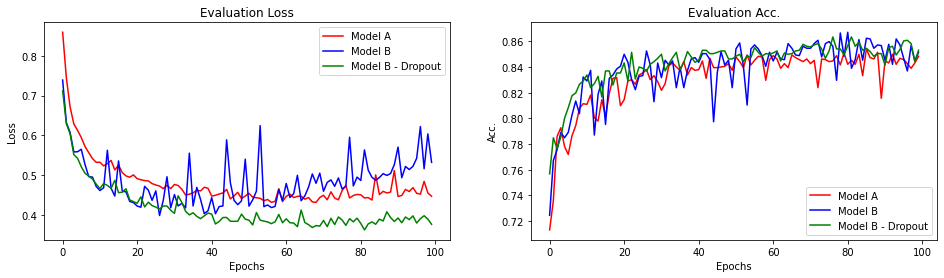

In [52]:
print(f"Test acc: model A {acc_a:.3f}, model B {acc_b:.3f}, model C {acc_c:.3f}")

get_plot([hista, histb, histc], ["Model A","Model B", "Model B - Dropout"], len(hista['val_loss']))

## Q3: Optimizer

`(2 point)`

1. For Q1 and Q2, we use RMSprop (or any other optimizer you prefer). Now let's train the best model you get in Q1 using the following optimizers (for details, check https://pytorch.org/docs/stable/optim.html?highlight=optimizer#torch.optim.Optimizer): `(1 point)`
- SGD
- Adagrad
- RMSProp
- Adam

2. Plot the evaluation loss and accuracy curves for each optimizer.
<br><br>
3. Write your analysis (as markdowns) on the following: `(1 point)`
   - Which optimizer works the best? What makes this optimizer more effective? `(0.5 point)`: *from the learning curves, RMSProp and Adam work better. In particular, Adam produces smooth a learning curver. The main reason is that these two incorporate exponetially smoothed adaptive learning rate. Adam also implements momentum, which soomthes learning curves*
   - Which has the worst performance? Why does it perform poorly? `(0.5 point)` *SGD performs the worst, because this vanila gradient descent algorithm does not have adaptive learning rate. In this dataset, obviously, features are not equally important.*

In [515]:
# SGD
modelx = linear_model(input_dim = 784, hidden_units=[512,  10])
summary(modelx, (32, 784))

optimizer = torch.optim.SGD(modelx.parameters(), lr=0.0005)

acc_d, histd = train_model(modelx, train_dataset, val_dataset, test_dataset, device, optimizer, epochs=100)


Layer (type:depth-idx)                   Output Shape              Param #
linear_model                             --                        --
├─ModuleList: 1-1                        --                        --
│    └─Linear: 2-1                       [32, 512]                 401,920
│    └─Linear: 2-2                       [32, 10]                  5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
Total mult-adds (M): 13.03
Input size (MB): 0.10
Forward/backward pass size (MB): 0.13
Params size (MB): 1.63
Estimated Total Size (MB): 1.86

Training Start
Epoch:1 / 100, train loss:2.30438 train_acc:0.091, valid loss:2.292 valid acc:0.129
Epoch:2 / 100, train loss:2.29212 train_acc:0.127, valid loss:2.280 valid acc:0.173
Epoch:3 / 100, train loss:2.28011 train_acc:0.169, valid loss:2.268 valid acc:0.204
Epoch:4 / 100, train loss:2.26856 train_acc:0.201, valid loss:2.257 valid acc:0.227
Epoch:5 / 100, train loss:2.25732 train_acc:0.224, valid loss:2.246 valid acc:0.244
Epoch:6 / 100, train loss:2.24651 train_acc:0.242, valid loss:2.235 valid acc:0.266
Epoch:7 / 100, train loss:2.23576 train_acc:0.260, valid loss:2.224 valid acc:0.282
Epoch:8 / 100, train loss:2.22532 train_acc:0.274, valid loss:2.214 valid acc:0.292
Epoch:9 / 100, train loss:2.21509 train_acc:0.288, valid loss:2.204 valid acc:0.309
Epoch:10 / 100, train loss:2.20501 train_acc:0.300, valid loss:2.194 valid acc:0.319
Epoch:11 / 100, train loss:2.19510 train_acc:0.310, valid loss:2.184 valid acc:0.331
Epoch:12 / 100, train loss:2.18544 train_acc:0.323, valid l

In [516]:
# Adaptive learn
modelx = linear_model(input_dim = 784, hidden_units=[512,  10])
summary(modelx, (32, 784))

optimizer = torch.optim.Adagrad(modelx.parameters(), lr=0.0005)

acc_e, histe = train_model(modelx, train_dataset, val_dataset, test_dataset, device, optimizer, epochs=100)


Layer (type:depth-idx)                   Output Shape              Param #
linear_model                             --                        --
├─ModuleList: 1-1                        --                        --
│    └─Linear: 2-1                       [32, 512]                 401,920
│    └─Linear: 2-2                       [32, 10]                  5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
Total mult-adds (M): 13.03
Input size (MB): 0.10
Forward/backward pass size (MB): 0.13
Params size (MB): 1.63
Estimated Total Size (MB): 1.86

Training Start
Epoch:1 / 100, train loss:1.71792 train_acc:0.556, valid loss:1.404 valid acc:0.661
Epoch:2 / 100, train loss:1.27773 train_acc:0.656, valid loss:1.168 valid acc:0.676
Epoch:3 / 100, train loss:1.10987 train_acc:0.676, valid loss:1.044 valid acc:0.682
Epoch:4 / 100, train loss:1.01749 train_acc:0.688, valid loss:0.974 valid acc:0.695
Epoch:5 / 100, train loss:0.95529 train_acc:0.700, valid loss:0.926 valid acc:0.710
Epoch:6 / 100, train loss:0.91052 train_acc:0.714, valid loss:0.883 valid acc:0.716
Epoch:7 / 100, train loss:0.87627 train_acc:0.724, valid loss:0.853 valid acc:0.723
Epoch:8 / 100, train loss:0.84870 train_acc:0.729, valid loss:0.826 valid acc:0.735
Epoch:9 / 100, train loss:0.82646 train_acc:0.739, valid loss:0.807 valid acc:0.741
Epoch:10 / 100, train loss:0.80581 train_acc:0.746, valid loss:0.787 valid acc:0.745
Epoch:11 / 100, train loss:0.78855 train_acc:0.752, valid loss:0.770 valid acc:0.762
Epoch:12 / 100, train loss:0.77480 train_acc:0.756, valid l

In [517]:
# Adam

modelx = linear_model(input_dim = 784, hidden_units=[512,  10])
summary(modelx, (32, 784))

optimizer = torch.optim.Adam(modelx.parameters(), lr=0.0005)

acc_f, histf = train_model(modelx, train_dataset, val_dataset, test_dataset, device, optimizer, epochs=100)


Layer (type:depth-idx)                   Output Shape              Param #
linear_model                             --                        --
├─ModuleList: 1-1                        --                        --
│    └─Linear: 2-1                       [32, 512]                 401,920
│    └─Linear: 2-2                       [32, 10]                  5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
Total mult-adds (M): 13.03
Input size (MB): 0.10
Forward/backward pass size (MB): 0.13
Params size (MB): 1.63
Estimated Total Size (MB): 1.86

Training Start
Epoch:1 / 100, train loss:1.34429 train_acc:0.593, valid loss:0.833 valid acc:0.706
Epoch:2 / 100, train loss:0.76821 train_acc:0.733, valid loss:0.672 valid acc:0.767
Epoch:3 / 100, train loss:0.64523 train_acc:0.782, valid loss:0.601 valid acc:0.795
Epoch:4 / 100, train loss:0.57828 train_acc:0.798, valid loss:0.577 valid acc:0.798
Epoch:5 / 100, train loss:0.52984 train_acc:0.821, valid loss:0.519 valid acc:0.822
Epoch:6 / 100, train loss:0.50169 train_acc:0.830, valid loss:0.505 valid acc:0.834
Epoch:7 / 100, train loss:0.47351 train_acc:0.844, valid loss:0.527 valid acc:0.810
Epoch:8 / 100, train loss:0.45415 train_acc:0.847, valid loss:0.477 valid acc:0.829
Epoch:9 / 100, train loss:0.43437 train_acc:0.849, valid loss:0.498 valid acc:0.824
Epoch:10 / 100, train loss:0.42055 train_acc:0.855, valid loss:0.467 valid acc:0.836
Epoch:11 / 100, train loss:0.41622 train_acc:0.859, valid loss:0.470 valid acc:0.833
Epoch:12 / 100, train loss:0.38816 train_acc:0.866, valid l

Test acc: SGD 0.640, Adagrad 0.810, RMSprop 0.845, Adam 0.841 


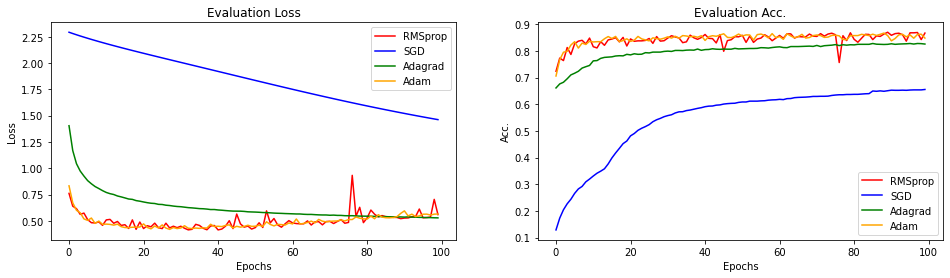

In [519]:
#plot

print(f"Test acc: SGD {acc_d:.3f}, Adagrad {acc_e:.3f}, RMSprop {acc_b:.3f}, Adam {acc_f:.3f} ")

get_plot([histb, histd, histe, histf], ["RMSprop", "SGD", 'Adagrad','Adam'], len(histb['val_loss']))

## Q3: Bonus

`(2 points)`

In linear regression, we can check coefficients to understand what features are sensitive to predictions. Similarly, here With `Model C`, we'd like to understand what regions of a picture are sensitive to the final prediction. Could you find a way to identify such regions in each of the following images? You can highligh these regions by overlapping a heatmap on the original images. (Hint, think about gradients)


*Basic idea:
We can calculate gradients of loss with regard to inputs. If a pixel has a large gradient, any changes to it may change the loss dramatically. This allows to identify the sensitive areas.*

image tensor: torch.Size([6, 1, 28, 28])
class labels: tensor([9, 2, 1, 1, 6, 1])


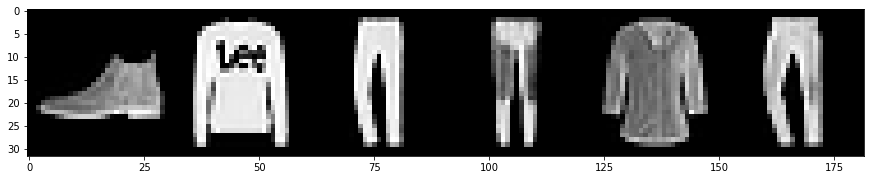

In [13]:
batch_size = 6

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
imgs, labels = next(iter(test_loader))
plt.figure(figsize=(15,10))
grid = torchvision.utils.make_grid(nrow=batch_size, ncols=1, tensor=imgs)
print(f"image tensor: {imgs.shape}")
print(f"class labels: {labels}")
plt.imshow(np.transpose(grid, axes=(1,2,0)), cmap='gray');

In [33]:
modelc.eval()
x = torch.tensor(imgs, requires_grad=True)
outputs = modelc(x.view(batch_size, -1))  
criterion = nn.CrossEntropyLoss()
loss = criterion(outputs, labels.long())


linear_model_with_dropout(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=10, bias=True)
  )
  (dropout): Dropout(p=0.3, inplace=False)
)

<ipython-input-33-946a335f3c93>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(imgs, requires_grad=True)


In [34]:
optimizer.zero_grad()

loss.backward()
g = x.grad.cpu().numpy()
g1 = np.squeeze(np.abs(g))
g1.shape

(6, 28, 28)

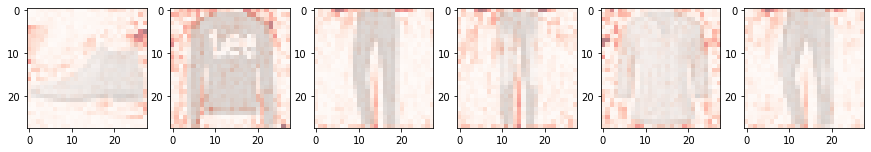

In [56]:
img = imgs.cpu().numpy().squeeze()
fig, axes = plt.subplots(1, batch_size, figsize=(15,10))

for i in range(batch_size):
    
    axes[i].imshow(np.squeeze(img[i]), alpha = 0.3, cmap='Greys')
    hm = axes[i].imshow(g1[i], alpha = 0.5, cmap='Reds')
    
plt.show()